# Task 4. Unsupervised learning: PCA and Clustering
    
Welcome to the fourth part of Laboratory for Applied Machine Learning Approaches! Today, we will work with the Samsung Human Activity Recognition dataset. The data comes from accelerometers and gyros of Samsung Galaxy S3 mobile phones, the type of activity of a person with a phone in his/her pocket is also known – whether he/she walked, stood, lay, sat or walked up or down the stairs. But in comparison to the last task, the focus of this weeks lab is not to build a classification model with supervised learning. Instead, we are focusing on a different application field: Unsupervised Learning. We will work with unsupervised learning methods such as Principal Component Analysis (PCA) and clustering. You will learn why and how we can reduce the dimensionality of the original data and what the main approaches are for grouping similar data points.  


### Learning Goals for today 
You are able to
- explain the difference between supervised and unsupervised learning
- describe the functionality of Principal Component Analysis and implement it
- use PCA to reduce the dimensionality of data
- outline the function principle of the Clustering Algorithm K-Means
- implement and select suitable metrics for the performance evaluation of clustering results


## Introduction

Thus far, we have presented machine learning methods largely in the context of _supervised_ learning.  This means we talked about machine learning data sets as having inputs $x$, outputs $y$, and the goal of a machine learning algorithm is to learn how to predict $y$ from $x$. Supervised learning does traditionally dominate the majority of practical data science applications, but in this task, we'll discuss approaches that differ from this. In particular, we'll consider the setting of unsupervised learning, we are _not_ given corresponding input/output pairs, but where we are _just_ given the inputs $x$. When compared to classification and regression methods, the main idea is that input data are unlabeled (i.e. no labels or classes given). Of course, this raises the obvious question: if we aren't given a target output, what exactly are we supposed to predict? And indeed, the task of unsupervised learning is ambiguous on some level. However the general philosophy of unsupervised learning is that we want to discover some kind of structure in the data and that the algorithm learns the structure of the data without any assistance.  Different unsupervised learning methods work in very different ways, and discover very different kinds of structure, but they all have this similar element. 


**Question:** What are the two main differences regarding training and evaluation between supervised and unsupervised learning?
Tip: Think of the input and output of the two categories!

**Answer:** When using supervised learning, the model works with labeled datasets. During the training part it tries to find the correlation between the input data x and the label y. For the evaluation the model tries to predict the labels for a test dataset. Since we have the right labels, we can compare those to the predicted ones and calculate the accuracy from there.

In unsupervised learning we use unlabeled data. The model simply tries to find correlations within the dataset. The evaluation is the interpretation of the results by hand.


# Principal Component Analysis (PCA)

As mentioned before, different application domains for unsupervised learning algorithms exist.  One of the most common tasks in unsupervised learning is dimensionality reduction, where the goal is to simplify the data without losing too much information. Several correlating characteristics can be combined into one. For example, the mileage of a car correlates with its age, so a dimensional reduction algorithm can combine both into one feature that represents the wear and tear of the vehicle. This is also called feature extraction. Visualization algorithms are another good example of unsupervised learning: you give them a lot of complex data without labels and get a 2-D or 3-D representation of the data that you can easily graphically represent. Such algorithms try to preserve the structure of the data as well as possible (e.g., prevent clusters in the input data from overlapping in the visualization), so that you can more easily understand how the data is structured, and may encounter unexpected patterns.

Today, we will use Principal Component Analysis to visualize datasets and reduce their dimensionality.

## Intuition, theories, and application issues

Principal Component Analysis is one of the easiest, most intuitive, and most frequently used methods for dimensionality reduction, projecting data onto its orthogonal feature subspace. Orthogonal subspace means, that we create a feature space of linear combinations of our original features. As in the original space, the newly constructed features are orthogonal to each other. It first finds the hyperplane closest to the data and then projects the data onto it.

<table class="image">
<caption align="bottom"> Selection of a subspace for projection [Geron, 2018]</caption>
<tr><td><img src='img/pca_projection_geron.png' width=70% /></td></tr>
</table>
As an example, the figure above shows on the left a simple 2-D dataset with three different axes (i.e. one-dimensional hyperplanes). On the right, you see the projections of the data set on each of these axes. As you can see, the projection on the solid line retains maximum variance, while the projection on the dotted line retains very little variance. The projection on the dashed line is somewhere in between.

It seems reasonable to select the axis so that a maximum of variance is preserved, because less information is lost than with the other projections. The selection can also be justified by the fact that the mean square distance between the original data set and the projection is minimal. This simple basic idea is the essence of Principal Component Analysis: PCA tries to find the first principal component by minimizing the reconstruction (projection) error, which simultaneously maximizes the variance of the projected data.

<img align=right src='img/pca_projection_connection.png' width="400">

The PCA searches for the axis on which the greatest variance of the training data lies. An axis orthogonal to the first axis is also found, which corresponds to the largest remaining variance. In a higher dimensional data set, the PCA would also find a third axis, orthogonal to the two previous axes, then a fourth axis, a fifth axis, and so on - as many axes as the data set has dimensions. The unit vector that defines the $i^{th}$ axis is called the $i^{th}$ principal component (PC). In the figure the 1st principal component is $c_1$ and the second $c_2$.

More generally speaking, all observations can be considered as an ellipsoid in a subspace of an initial feature space, and the new basis set in this subspace is aligned with the ellipsoid axes. This assumption lets us remove highly correlated features since basis set vectors are orthogonal. 
In the general case, the resulting ellipsoid dimensionality matches the initial space dimensionality, but the assumption that our data lies in a subspace with a smaller dimension allows us to cut off the "excessive" space with the new projection (subspace). We accomplish this in a 'greedy' fashion, sequentially selecting each of the ellipsoid axes by identifying where the dispersion (variance) is maximal.
 

> "To deal with hyper-planes in a 14 dimensional space, visualize a 3D space and say 'fourteen' very loudly. Everyone does it." - Geoffrey Hinton


Let's take a look at the mathematical formulation of this process:

In order to decrease the dimensionality of our data from $n$ to $k$ with $k \leq n$, we sort our list of axes in order of decreasing dispersion and take the top-$k$ of them.

But how can I find the principal components for a training dataset?

We begin by computing the variance and the covariance of the initial features. This is usually done with the covariance matrix. According to the covariance definition, the covariance of two features is computed as follows: $$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$ where $\mu_i$ is the expected value of the $i$th feature. It is worth noting that the covariance is symmetric, and the covariance of a vector with itself is equal to its variance.

Therefore the covariance matrix is symmetric with the variance of the corresponding features on the diagonal. Non-diagonal values are the covariances of the corresponding pair of features. In terms of matrices where $\mathbf{X}$ is the matrix of observations, the covariance matrix is as follows:

$$\mathbf{C} = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

In the case of two dimensions:

$$ \Large \mathbf{C} = \begin{pmatrix}
\sigma_{X_1}^2 & cov(X_1, X_2)    \\
 cov(X_2, X_1) & \sigma_{X_2}^2   \\
\end{pmatrix} $$
If we have a mean-centered dataset ($\mu =0$) the computation simplifies to 

$\Large \mathbf{C} = \frac{\mathbf{X}\cdot \mathbf{X}^T}{n-1}$.

Now remember what PCA wants to accomplish: maximize the variance in the projected space. Equally speaking:
if $\mathbf{X}$ is the data matrix, then the projection on the vector $w$ is given by $\mathbf{X}w$ and its variance is 
$$\Large \sigma_w^2 =  \frac{1}{n−1}(\mathbf{X}w)^T \cdot\mathbf{X}w=w^T\cdot (\frac{1}{n−1}\mathbf{X}^T\mathbf{X})\cdot w=w^T \mathbf{C} w$$.



Quick recap: matrices, as linear operators, have eigenvalues and eigenvectors. They are very convenient because they describe parts of our space that do not rotate and only stretch when we apply linear operators on them; eigenvectors remain in the same direction but are stretched by a corresponding eigenvalue. Formally, a matrix $\mathbf{M}$ with eigenvector $v_i$ and eigenvalue $\lambda_i$ satisfy this equation: $\mathbf{M} v_i = \lambda_i v_i$.
As our covariance matrix $ \mathbf{C} $ is symmetric, we can diagonalize it by choosing a new orthogonal coordinate system, which is given by the eigenvectors of the covariance matrix $ \mathbf{C} $. The covariance matrix in the new space looks like that:
$$ \Large \mathbf{C_{EV}} = \begin{pmatrix}
\lambda_1 & 0  \\
0 & \lambda_2  \\
\end{pmatrix} $$
So the new covariance matrix is diagonal, the dimensions are uncorrelated ($ cov(EV_1, EV_2) = 0 $) and the eigenvalues $\lambda_i$ are on the diagonal. Inserting this above in $\sigma_w^2$ (we want to maximize that) leads to:
$$ \Large \sigma_w^2 =  w^T \mathbf{C}_{EV} w = \Sigma_i \lambda_i w^2_i$$
In the new orthogonal basis the variance is given by the weighted sum of the eigenvalues. Consequently, the maximum possible variance will be achieved if we simply take the projection on the first coordinate axis. It follows that the direction of the first principal component is given by the first eigenvector of the covariance matrix.
Putting all the eigenvectors in one matrix, we get
$$\Large \mathbf{V} = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf v}_{1} & {\bf v}_{2} & \cdots & {\bf v}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}$$
The principal components we aim to retain from the data are just the eigenvectors corresponding to the top-$k$ largest eigenvalues of the matrix. The PCA assumes that the data set is centered around the coordinate origin which is needed to guarantee that the first principal component (first eigenvector) is laying in the axis with maximal variance. Otherwise, the first principal component may only point to the datas mean value. 

The next steps are easier to digest. We multiply the matrix of our data $\mathbf{X}$ by these components to get the projection of our data onto the orthogonal basis of the chosen components. If the number of components was smaller than the initial space dimensionality, remember that we will lose some information upon applying this transformation.



If we formulate the math from above as a pseudocode, we get the

**Pseudocode for PCA** 
1. Define $k<d$ – as new dimensionality
2. Perform mean centering of $X$: 
 
3. Compute the covariance matrix $\mathbf{C}$ of $\mathbf{X}$

4. Perform the eigenvalue decompositon of the covariance matrix such that:
    $$ \Large \mathbf{C} \cdot v_i = \lambda_i \cdot v_i $$
    
5. Sort the eigenvectors $v_i$ in descending order of their eigenvalues $\lambda_i$ to get $V \in \mathbb{R}^{d\times d}$

6. Select the top-$k$ eigenvectors as principal components
 $$V = \begin{pmatrix}
v_{1,1} & \cdots & v_{1,k}   \\
 \vdots &  &   \vdots \\
 v_{d,1} &  &v_{d,k} \\
\end{pmatrix} \in \mathbb{R}^{d \times k} $$
6. Return $$\Large Z = XV \in \mathbb{R}^{m \times k}$$
7. Loss given by 
  - $\Large \sum_{i=k+1}^n \lambda_i$  ("lost" variance) or
  
  - $\lVert \mathbf{X} - \mathbf{X}ww^T\rVert^2$ (reprojection error)

## Developing a PCA Implementation

In this task we want to implement our own simple PCA implementation and understand the working principle.

### Understanding PCA with the Iris Dataset
Lets start with the dataset we used in task 2, the iris dataset. Therefore, first of all we have to load all required libraries and our data. 

In [1]:
# Imports
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import decomposition
from IPython import display
%matplotlib inline
import seaborn as sns
import ipywidgets as widgets

plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

Second, we load the dataset from the csv file, just as in task 2. The sepal length is shown versus the petal width of the flowers.

Text(0, 0.5, 'Petal width')

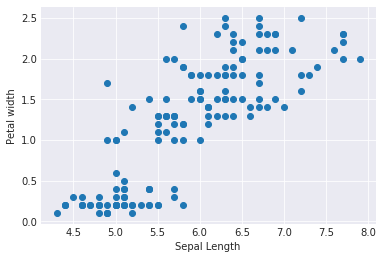

In [2]:
# Load dataset
filename = 'iris.data.csv'
names = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Class']
X = pd.read_csv(filename, names=names)
# split label info
y = X.Class
# drop labels from data
X = X.drop(['Class'],axis=1)
plt.scatter(X['Sepal-length'],X['Petal-width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal width')

**Note**: As you may see, we have target values (aka labels) for our data, so we could also use supervised methods. But we can also make use of the labels in the unsupervised context, which we will see later on.

The next step in our analytics process would be an exploration of our dataset with different statistics and plots. As we have done this in task 2 above, we skip this step.

Afterwards, we can prepare our data for using PCA. Following step two of the pseudocode of the PCA, it is necessary to mean-center our data. Fill the following lines to perform the preparation step. Name the __centered__ dataset __X_centered__.

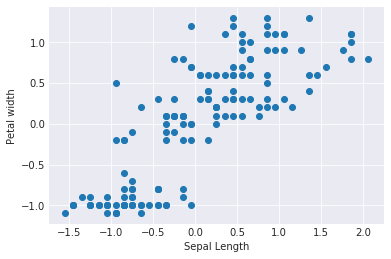

In [3]:
# center X by mean
# STUDENT CODE HERE

from sklearn.preprocessing import scale

X_centered = X-X.mean()

plt.scatter(X_centered['Sepal-length'],X_centered['Petal-width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal width');

# STUDENT CODE until HERE

Looking at the plot from above, you suspect that the sepal length and the petal width are correlated. To confirm this, calculate their Pearson correlation.

**Question**: Do you get evidence for your statement if you look at the correlation value?

**Answer:** The correlation value is 0.8179 which means that the correlation between sepal length and petal width is fairly high.


In [4]:
# STUDENT CODE HERE

pearsonr(X['Sepal-length'], X['Petal-width'])

# STUDENT CODE until HERE

(0.8179536333691633, 2.3148491512729807e-37)

To get a better idea of the PCA, we first want to show the working principle, therefore we made an interactive widget. The widget shows a scatterplot of the sepal length and the petal width of our dataset. The data will be projected on to the selected axis shown as a black solid line. The axis of projection can be set with the slider above the image, which controls the angle of the line. The loss of the projection (reprojection error) is also calculated.

In [5]:
#### DO NOT EDIT
def projectionError(pointsOrig,projectionMatrix):
    pointsProjected = pointsOrig.dot(projectionMatrix).dot(projectionMatrix.T)
    sumSquaredDistance = sum(sum((pointsProjected-pointsOrig)**2))
    projErr = sumSquaredDistance/len(pointsOrig)
    return projErr
def varianceProjected(pointsOrig, projectionMatrix):
    z = pointsOrig.dot(projectionMatrix)
    return np.var(z[:,0])
def printLossGain(pointsOrig,projectionMatrix):
    print("Projection Error: {:0.4f}".format(projectionError(pointsOrig,projectionMatrix)))
    print("Projected Variance: {:0.4f}".format(varianceProjected(pointsOrig,projectionMatrix)))

In [6]:
#### DO NOT EDIT
###PCA###drawing
def update_pca_2D(X,alpha):
    #plt.figure(2,figsize=(8,8))
    plt.cla()
    w = np.array([np.cos(np.deg2rad(alpha)), np.sin(np.deg2rad(alpha))]).reshape(2,1)
    z = X.dot(w).dot(w.T)
    for i in range(0,100):
        plt.plot([X[i,0], z[i,0]], [X[i,1], z[i,1]], c='r',aa=False)
    
    plt.plot(w[0]*3.5*np.array([-1, 1]), w[1]*3.5*np.array([-1, 1]), c='k',aa=False)
    plt.plot(-w[1]*2*np.array([-1, 1]), w[0]*2*np.array([-1, 1]), c=(.6 ,.6, .6),aa=False)
    
    plt.scatter(z[:,0], z[:,1], c='r')
    plt.scatter(X[:,0], X[:,1], c='b')
    sct = plt.scatter(0,0,65,c='k',linewidth= 2)
    #plt.setp(sct,mfc = (1, 1 ,1), mec = (0, 0, 0))    
    printLossGain(X,w)
    minval = min(min(X[:,0]),min(X[:,1]))
    maxval = max(max(X[:,0]),max(X[:,1]))
    plt.xlim([minval, maxval])
    plt.ylim([minval, maxval])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal width')
    #plt.show()

In [7]:
#### DO NOT EDIT
###PCA###drawing

plt.figure() 
X0 = X_centered[['Sepal-length','Petal-width']]
interactive_plot = widgets.interactive(update_pca_2D,
         alpha=widgets.FloatSlider(min=-90, max=90, step=0.2, layout=widgets.Layout(width='90%')),
                               X=widgets.fixed(X0.values))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='alpha', layout=Layout(width='90%'), max=90.0, min=-9…

<Figure size 432x288 with 0 Axes>

**Question:** Now set the value of alpha in a such a way that the variance is maximized. What do you notice concerning the projection error, and which angle do we get for the black line?

**Answer:** For a maximized variance, the projection error is minimized. We get an angle of 42.4° for the black line.


**Question:** What does that mean for our first principal component? Name one possible first principal component. What is the grey line showing?

**Answer:** The first principal component is the axis on which the greatest variance of the data lies, hence our first principal component is the black axis rotated by 42.4°. The grey line is orthogonal to the black line which corresponds to the greatest remaining variance. Therefore the grey line represents our second principal component.



**Question:** Explain the loss and how do we make a loss here. What is the connection between the first Principal Component and the variance?

**Answer:** Since not all data lies on the line of the first principal component, some information or variance ist lost, when we project all data on this line. The first principal component is the axis on which the greatest variance of the data lies.


### Implementing the PCA function.
Use the given pseudocode to perform a PCA. Therefore, fill the gaps in the code below.

In [8]:
def pca_own(X,k): 
    """ Calculates the Principal Component Analysis of X
        Args: 
            X : correctly scaled matrix of data, each row is an observation
            k (int) : number of components selected for the output.
        Returns: 
            w : k eigenvalues 
            V : the matrix of k principal components
            loss: the error made by using only k components as feature space
    """
    # Tip: use the argsort() function to get the indices for sorting of V
    # STUDENT CODE HERE   
    
    from numpy import linalg as LA
    from numpy import cov
    
    #X_centered_data = scale(X, axis=0, with_mean='True')
    #X_centered = pd.DataFrame(X_centered_data, columns=X.columns)
    
    Cov = cov(X.T)
    w, V = LA.eig(Cov)
    
    w_indices = w.argsort()[::-1]
    w_sorted = w[w_indices]
    V_sorted = V[w_indices]
    
    loss = np.sum(w_sorted[k:])

    # STUDENT CODE until HERE
    return w_sorted[:k], V_sorted[:,:k], loss


Now use your function to calculate the two PCs of the dataset $X0$. $X0$ consists of the two features sepal length and petal width. The function for plotting is already given below.

In [50]:
# select features for demonstration
X0 = X_centered[['Sepal-length','Petal-width']]
# Call your PCA function with given k
# STUDENT CODE HERE

w, V, loss = pca_own(X0,2)

# STUDENT CODE until HERE

Directions of principal components:
1st component: [0.7414199  0.67104138] 
2nd component: [-0.67104138  0.7414199 ]
Loss by PCA transformation:  0.0


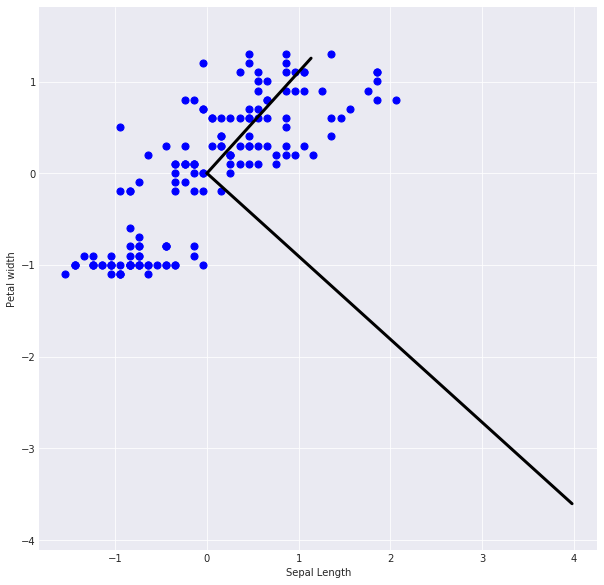

In [10]:
# DO NOT CHANGE
print('Directions of principal components:\n' +\
      '1st component:',
      V[:,0],
      '\n2nd component:', 
      V[:,1]
     )
print('Loss by PCA transformation: ',loss)


# Plotting function
plt.figure(figsize=(10,10))
plt.scatter(X0['Sepal-length'], X0['Petal-width'], s=50, c='b')

for l, v in  zip(w, V):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')

plt.xlabel('Sepal Length')
plt.ylabel('Petal width')
plt.show()

**Question:** Have a look at the loss calculated above. Do you have an explanation for the value?

**Answer:** Since we are only using two features, we only have two dimensions, therefore we only need two principal components to keep all variance.


### Reducing the Dimension
Till now, we have seen the direction of the first two principal components of the dataset $X0$. Now we want to use the whole dataset ($X_{centered}$) to be reduced on two variables.

Fill in the gaps to call your own function "pca_own" with the correct value for $k$. Afterwards transform the data to the new feature space using the principal components returned by your function. 


The function for visualizing the results is given below. The color of the dots is indicating the target value (=iris class).

**Question:** What value do we have to set for k, and what is the benefit of the PCA in this case?

**Answer:** To reduce the dimensions and simplify the data but still have a practical output, which can be interpreted easily just by looking at it, k should be 2.


In [11]:
# STUDENT CODE HERE

w, V, loss = pca_own(X_centered,2)

X_transf = X_centered.dot(V)

# STUDENT CODE until HERE


0.10220693522015732
Directions of principal components:
1st component: [ 0.36158968 -0.08226889  0.85657211  0.35884393] 
2nd component: [-0.65653988 -0.72971237  0.1757674   0.07470647]
Meaning of the 2 components:
0.362 x Sepal-length + -0.082 x Sepal-width + 0.857 x Petal-length + 0.359 x Petal-width
-0.657 x Sepal-length + -0.730 x Sepal-width + 0.176 x Petal-length + 0.075 x Petal-width


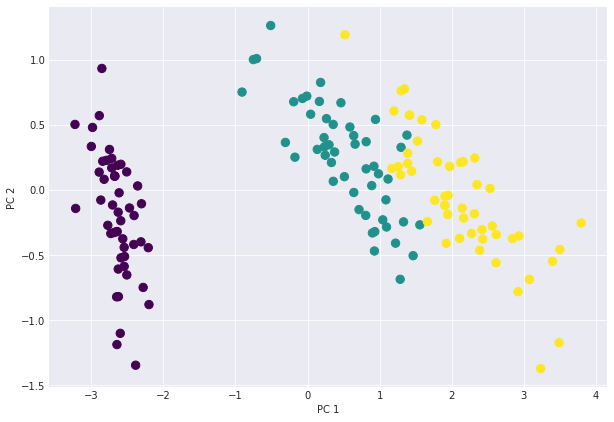

In [12]:
# DO not edit
print(loss)
print('Directions of principal components:\n' +\
      '1st component:', 
      V[:,0],
      '\n2nd component:',
      V[:,1]
     )

print("Meaning of the 2 components:")
for component in V.T:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            names)))
plt.figure(figsize=(10,7))
# encoding labels as numbers for plotting
le = LabelEncoder()
y_plt = le.fit_transform(y)
plt.scatter(X_transf.loc[:, 0], X_transf.loc[:, 1], c=y_plt, s=70, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

**Question:** What is the meaning of the two principal components as printed above? 

**Answer:** The two principal components specify in which way the different features have to be altered to fit them to the new dimensions.



## PCA for Iris Dataset with scikit-learn 
Now that we implemented PCA from scratch and understood the most important characteristics, we can step ahead and use the built-in PCA of Scikit-learn. There will be slightly different results in comparison to our own PCA function, because the scikit-learn implementation uses another mathematical formulation of the problem. Details on that can be found in the appendix. On the other hand, the implementation of Scikit contains further helpful functions. For example, we can directly transform our data in the selected subspace with the function fit_transform. 

### Reducing Dimensions
The library "decomposition" of sklearn contains the PCA implementation. Compute the PCA of the complete centered dataset $\mathbf{X}_{centered}$ selecting two principal components. Afterwards, transform the dataset to the new feature space. Fill in the gaps below and get the PCs. 

In [14]:
# STUDENT CODE HERE 

pca_2 = decomposition.PCA(n_components=2)

X_pca = pca_2.fit_transform(X_centered)

# STUDENT CODE until HERE 

In [51]:
print('Direction of first principal component:\n' ,
      # STUDENT CODE HERE 
      
      pca_2.components_[0]
     
      # STUDENT CODE until HERE 
     )

Direction of first principal component:
 [ 0.36158968 -0.08226889  0.85657211  0.35884393]


In [52]:
print('Direction of second principal component:\n' ,
      # STUDENT CODE HERE 

      pca_2.components_[1]
            
      # STUDENT CODE until HERE 
     )

Direction of second principal component:
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]


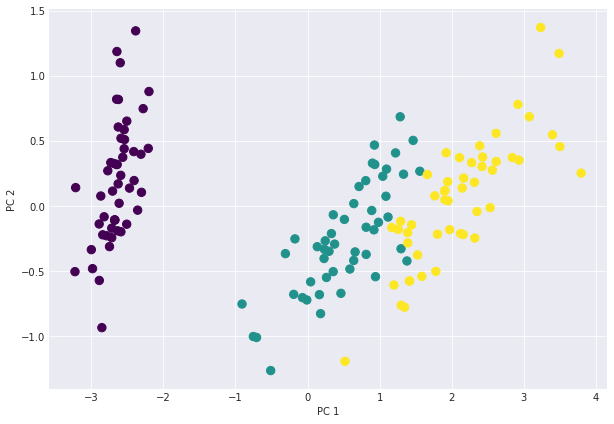

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_plt, s=70, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

**Question:** 
As we have seen above every PC is modeling some part of the variance of our original data. How much of the original datas information is preserved if we reduce the dimensions? What portion of variance is lost if we would only use one PC? Therefore, display the corresponding parameters of the PCA model.

**Answer:** When using two PCs, roughly 97.8% of variance is preserved. If we reduce the dimensions to one PC, 92.5% of variance is preserved so about 5% less than with one dimension more.

When comparing the preserved variance with one, two and three PCs we can see that the amount of preserved variance doesn't grow linearly with more dimensions.


In [55]:
# STUDENT CODE HERE

pca_3 = decomposition.PCA(n_components=3)
pca_3.fit(X_centered)
n_3_preserved = pca_3.explained_variance_ratio_

print("Preserved variance with three components:", n_3_preserved.sum())

pca_2 = decomposition.PCA(n_components=2)
pca_2.fit(X_centered)
n_2_preserved = pca_2.explained_variance_ratio_

print("Preserved variance with two components:", n_2_preserved.sum())

pca_1 = decomposition.PCA(n_components=1)
pca_1.fit(X_centered)
n_1_preserved = pca_1.explained_variance_ratio_

print("Preserved variance with one component:", n_1_preserved.sum())

# STUDENT CODE until HERE

Preserved variance with three components: 0.9948169145498101
Preserved variance with two components: 0.9776317750248034
Preserved variance with one component: 0.9246162071742684


In general, the amount of information we re retained here should be enough to maintain a good representation of our dataset. In practice, we would choose the number of principal components such that we can explain at least __90% of the initial data dispersion__ (via the `explained_variance_ratio`). 

### Accumulated Variance 
Below a function for plotting the individual explained variance ratio of each PC is given. Add a plot for the accumulated variance of all PCs. The *"step"* function with option *where='mid'* is used to plot the cumulative variance. Fill in the appropriate gap.

In [56]:
def plotPCAVariance(var_exp, X):
    #STUDENT CODE HERE
    
    cum_var_exp = [sum(var_exp[:(i+1)]) for i in range(len(var_exp))]
    
    #STUDENT CODE until HERE
    
    #plotting individual explained variance is given
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    ax.bar(range(1, X.shape[1]+1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal component index')    
    ax.set_xlim(0.5, X.shape[1]+0.5)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticks(np.arange(1,X.shape[1]+1,1))

    #plotting
    ax.step(range(1, X.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
    ax.legend(loc='best')
    return fig, ax

We have to get the explained variances for all PCs so we don't specify k when we call the PCA().fit() function. Afterwards we can use the result as input for our function and plot the explained variances.

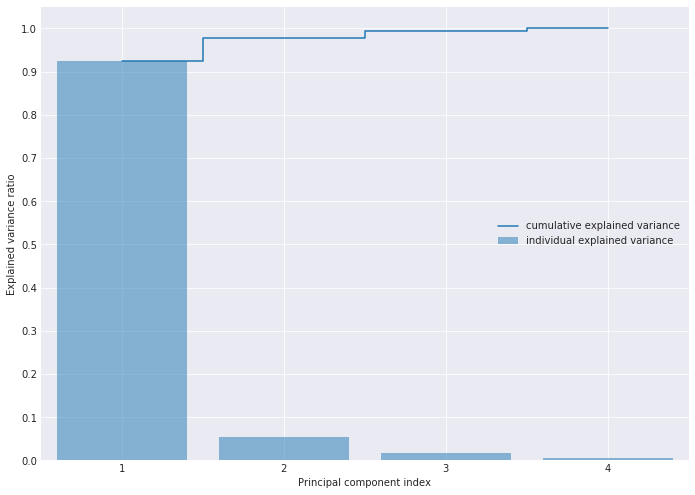

In [49]:
#  fit to centered data with k=Number of Features
pca = decomposition.PCA().fit(X_centered)
# get explained variance
var_exp = pca.explained_variance_ratio_
#plot
fig, ax = plotPCAVariance(var_exp, X_centered)



**Question:** How many PCs do we have to choose? What does that mean to our feature space? What is the intrinsic dimension of the dataset?

**Answer:** Since the cumulative explained variance ratio is greater than 90% for all PCs, we could choose any number of PCs. For reaching our goal of reducing dimensions, four PCs would not be doing us any good and with only one PC it is difficult to interpret the data. The same goes for three PCs so two PCs would probably be a good choice. 


### Influence of Scaling

Up to now, we always used the mean-centered dataset. But as we learned in earlier tasks, there exist various ways to scale our dataset before performing any action. One example is normalization aka Z-Standardization.

**Question:** What do you think would happen, if we use PCA on Z-Standardized data instead of mean-centered data? Explain briefly, why.

**Answer:** Z-standardization applys all data to the same range of variance. As a result, if we use PCA on Z-Standardized data, the difference in the amount of explained variance for each PC won't be as high.


## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, we tend to start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by different scaling as well as outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA`` uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data. It has a computation time complexity of $\mathcal{O} (m \cdot d2) + \mathcal{O} (d3)$ instead of $\mathcal{O}(m \cdot n2) + \mathcal{O}(n3)$ and is therefore far superior to the previous algorithms, provided that d is significantly smaller than n. while ``SparsePCA`` introduces a regularization term that serves to enforce sparsity of the components.

One difficulty with standard implementation of the PCA (via SVD; see below) is that the entire training data set must fit into the memory for the SVD algorithm to run. Fortunately, incremental PCA (IPCA) algorithms have been developed: you can split the training data set into smaller portions and feed one IPCA algorithm one portion at a time. This is useful for large training datasets and when using PCA in onlineenvironments (i.e. as soon as new data points arrive). Note that for each subrecord you must call the partial_fit() method instead of fit() with all the training data.

# Appendix A: Computation of PCA via SVD
The computation of PCA via the covariance matrix is prone to errors and needs a lot of memory. Fortunately, there is a standard technique for matrix factorization, Singular Value Decomposition (SVD), which allows you to decompose the matrix $X$ with the training data into the scalar product of the three matrices $U \cdot  S \cdot V^T$, where $V$ contains all the principal components you are looking for, as shown in the following formula:

$$\Large V = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf c}_{1} & {\bf c}_{2} & \cdots & {\bf c}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}$$
Internally, scikit-learn uses the SVD technique to compute the PCA.
$ \mathbf{S}$ contains the singular values

$$ \Large \mathbf{S} = \small \begin{pmatrix}
\sigma_1 &          &          &        & \vdots &        \\
         & \ddots   &          & \cdots & 0      & \cdots \\
         &          & \sigma_r &        & \vdots &        \\
\hline
         &  \vdots  &          &        & \vdots &        \\
\cdots   &  0       & \cdots   & \cdots & 0      & \cdots \\
         &  \vdots  &          &        & \vdots &        \\
\end{pmatrix} $$

Now we know that the vectors $c_1$ to $c_n$ are the principal components pointing in the direection of maximal variance. But what do the singular values in $\mathbf{S}$ mean? In fact, the squared singular values equal the eigenvalues of $X^T\cdot X$ (eigenvalue $\neq$ singular value!). The eigenvalue is proportional to the explained variance in the direction of the associated eigenvector. Consequently, also the squared singular values are proportional to the variance in the direction of the principal components (new feature dimensions) The sum of all the squared singular values is equal to the sum of the squared distances of the points from their multidimensional mean. As the covariance matrix can also be written in terms of $X^T\cdot X$, the proportionality of the squared singular values to the explained variance is the same as eigenvalues of the covariance matrix.
$$\Large \frac{\sigma_i^2}{\Sigma_i \sigma_i^2} = \frac{\lambda_i}{\Sigma_i \lambda_i}$$
with $\lambda$ as eigenvalue of $cov(X)$. So every squared singular value is explaining the same part of variance as the eigenvalues of the original covariance matrix.  